##### Deepiction V.0.5

## **Train and Test Deep Neural Networks**
- Tensorflow: unet, resnet
- Pytorch: unet_ten, unet_n2n

In [1]:
import numpy as np
import os
from deepiction.manager import load_model, create_model, create_model_gui, print_model, create_report
from deepiction.imagedataset import ImageDataset
from deepiction.test import Test
from deepiction.training import Training
from deepiction.tools import Tools

Tools.resources()



Resources
Current path: /Users/sage/Desktop/deepiction/current
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow Version:  2.11.0
device mps
Pytorch GPU available:  mps


**2. Selection of the dataset**
- task
    - binary: pixel classification, input 1 grayscale channel, output mask class=0 or class=1
    - nclass: pixel classification in n class, input 1 grayscale channel, output labels
    - regress: regression, input 1 grayscale channel, output 1 grayscale channel
- norm: (training, test), minmax, div255, none

In [11]:
#dataname, task, norm, color = 'simulation-object-256-8-2', 'nclass', ('minmax', 'none'), False
#dataname, task, norm, color = 'simulation-dmap-256-8-1', 'regres', ('minmax', 'none'), False
#dataname, task, norm, color = 'simulation-class-256-8-3', 'nclass', ('minmax', 'none'), False
dataname, task, norm, color = 'degradation-noisy-p50', 'regres', ('none', 'none'), False
#dataname, task, norm, color = 'simulation-binary-256-8-1', 'binary', ('minmax', 'none'), False
#dataname, task, norm, color = 'ctc-glioblastoma', 'binary', ('minmax', 'none'), False
#dataname, task, norm, color = 'lr2hr', 'regres', ('none', 'none'), True

datapath  = os.path.join('..', 'datasets', dataname)
dataset = ImageDataset(datapath, 'train/sources', 'train/targets')

#dataset.load(50, norm, color)
dataset.load_gui(200, norm, color)


Dataset folders: pairs of images
../datasets/degradation-noisy-p50/train/sources number of images: 80 files
../datasets/degradation-noisy-p50/train/targets number of images: 80 files



VBox(box_style='info', children=(HTML(value='<style> th, td { padding: 3px; } .dataframe { background-color: w…

In [12]:
# Visualisation of the sources images and the targets images
Tools.interactive_display(dataset.sources, dataset.targets, transparency=0.8)

In [19]:
#netname = 'PT_unet'
#netname = 'PT_dncnn'
#netname = 'TF_resnet'
netname = 'TF_unet'

npools, nchannels, batchnorm, dropout = 3, 32, False, 0
noutputs, ninputs = 1, 1
imagesize = dataset.get_image_size()

task = 'regres'
if task == 'binary': activation, loss, acc = 'sigmoid', 'bce', 'mse'
if task == 'nclass': activation, loss, acc = 'softmax', 'categorical_crossentropy', 'accuracy' 
if task == 'regres': activation, loss, acc = 'relu', 'mse', 'mae'

if task == 'nclass': dataset.makeClassesAsChannels()

#create_model_gui(imagesize, noutputs, ninputs, nchannels, npools, dropout, batchnorm, activation)

model = create_model(netname, imagesize, ninputs, noutputs, nchannels, npools, activation=activation)

#model = load_model(os.path.join('..', 'reports', dataname, 'TF_unet-3P-32C-4E-0.001LR', 'model_best_1.hdf5'))





TF Build architecture TF_unet (batchnorm: False dropout: 0)


In [15]:
# Check the model
print_model(model)

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 384, 384, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 384, 384, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 activation_30 (Activation)     (None, 384, 384, 32  0           ['conv2d_30[0][0]']              
                                )                                                             

                                )                                                                 
                                                                                                  
 conv2d_transpose_8 (Conv2DTran  (None, 384, 384, 32  8224       ['activation_41[0][0]']          
 spose)                         )                                                                 
                                                                                                  
 concatenate_8 (Concatenate)    (None, 384, 384, 64  0           ['conv2d_transpose_8[0][0]',     
                                )                                 'activation_31[0][0]']          
                                                                                                  
 conv2d_42 (Conv2D)             (None, 384, 384, 32  18464       ['concatenate_8[0][0]']          
                                )                                                                 
          

**4. Training**

Report path: ../reports/degradation-noisy-p50/TF_unet-3P-32C-40E-0.001LR
Training set: (60,60) images
Validation set: (20,20) images
Epoch 1/40
4/4 [==============================] - ETA: 0s - loss: 66708.3906 - mae: 156.5266
Epoch 1: saving model to ../reports/degradation-noisy-p50/TF_unet-3P-32C-40E-0.001LR/model_best_0.hdf5
4/4 [==============================] - 4s 754ms/step - loss: 66708.3906 - mae: 156.5266 - val_loss: 1172.3456 - val_mae: 25.7628
Epoch 2/40
4/4 [==============================] - ETA: 0s - loss: 5757.0366 - mae: 59.2492
Epoch 2: saving model to ../reports/degradation-noisy-p50/TF_unet-3P-32C-40E-0.001LR/model_best_0.hdf5
4/4 [==============================] - 3s 648ms/step - loss: 5757.0366 - mae: 59.2492 - val_loss: 10921.0713 - val_mae: 87.8546
Epoch 3/40
4/4 [==============================] - ETA: 0s - loss: 10117.7471 - mae: 84.3662
Epoch 3: saving model to ../reports/degradation-noisy-p50/TF_unet-3P-32C-40E-0.001LR/model_best_0.hdf5
4/4 [====================

4/4 [==============================] - 5s 1s/step - loss: 187.0218 - mae: 9.5652 - val_loss: 187.6232 - val_mae: 9.6286
Epoch 27/40
4/4 [==============================] - ETA: 0s - loss: 179.2082 - mae: 9.4263
Epoch 27: saving model to ../reports/degradation-noisy-p50/TF_unet-3P-32C-40E-0.001LR/model_best_0.hdf5
4/4 [==============================] - 5s 1s/step - loss: 179.2082 - mae: 9.4263 - val_loss: 181.3640 - val_mae: 9.5341
Epoch 28/40
4/4 [==============================] - ETA: 0s - loss: 173.7741 - mae: 9.3349
Epoch 28: saving model to ../reports/degradation-noisy-p50/TF_unet-3P-32C-40E-0.001LR/model_best_0.hdf5
4/4 [==============================] - 5s 1s/step - loss: 173.7741 - mae: 9.3349 - val_loss: 173.8614 - val_mae: 9.3767
Epoch 29/40
4/4 [==============================] - ETA: 0s - loss: 167.3535 - mae: 9.1909
Epoch 29: saving model to ../reports/degradation-noisy-p50/TF_unet-3P-32C-40E-0.001LR/model_best_0.hdf5
4/4 [==============================] - 5s 1s/step - loss: 

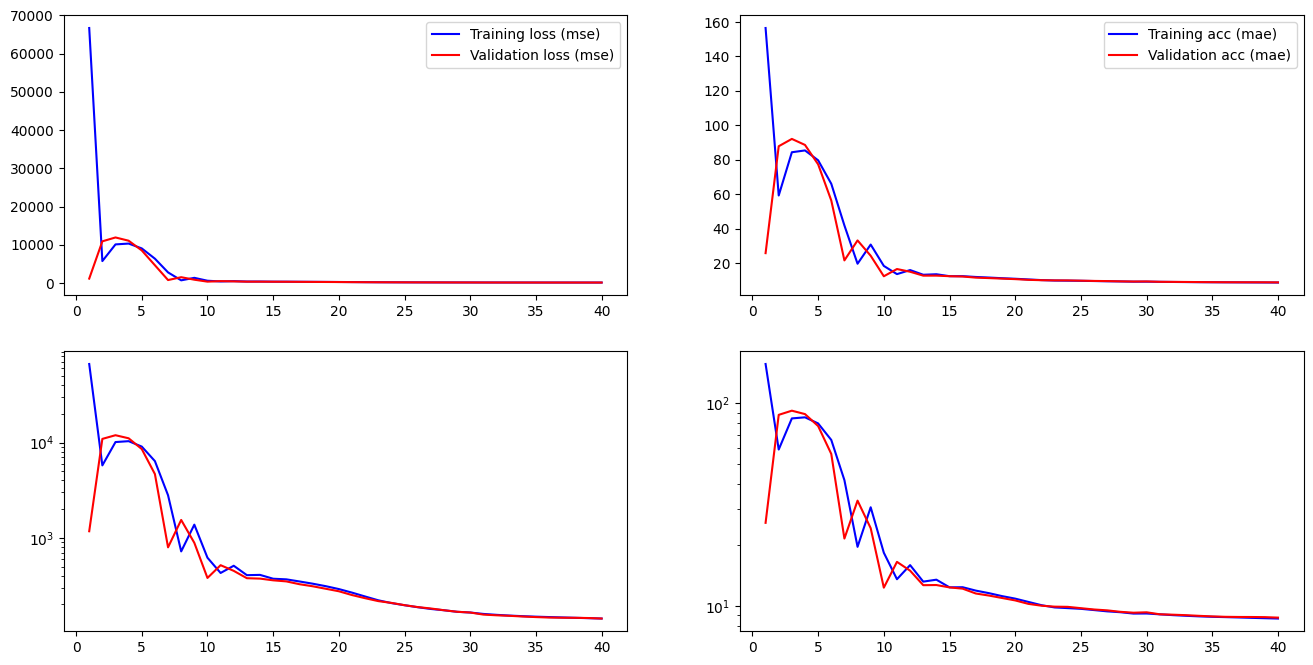

In [20]:
epochs, batchsize, learningrate = 40, 16, 0.001
trainname = f'{netname}-{npools}P-{nchannels}C-{epochs}E-{learningrate}LR'
path = os.path.join('../reports', dataname, trainname)
print('Report path:', path)

training = Training(dataset, model, path, split_validation=0.25)
report_training = training.train(epochs, 16, 0.001, loss, acc)

**5. Test**

In [8]:
# Load test data
dataset = ImageDataset(datapath, 'test/sources', 'test/targets')
dataset.load(10, norm, color)
dataset.report


Dataset folders: pairs of images
../datasets/simulation-binary-256-8-1/test/sources number of images: 101 files
../datasets/simulation-binary-256-8-1/test/targets number of images: 101 files



<bound method ImageDataset.report of <deepiction.imagedataset.ImageDataset object at 0x2e9564bb0>>

Start prediction
1/1 [==============================] - 0s 244ms/step
Prediction input(10, 256, 256, 1)
PSNR 0.21658557653427124 1
PSNR 0.1832011205313161 1
PSNR 0.21655859053134918 1
PSNR 0.17610245284828852 1
PSNR 0.21592208743095398 1
PSNR 0.17406310237311068 1
PSNR 0.21427865326404572 1
PSNR 0.17395840725134265 1
PSNR 0.2159712165594101 1
PSNR 0.17173627420005225 1
PSNR 0.21237269043922424 1
PSNR 0.1716593307148993 1
PSNR 0.21677039563655853 1
PSNR 0.17332892852396015 1
PSNR 0.21263718605041504 1
PSNR 0.17368572911222546 1
PSNR 0.21566683053970337 1
PSNR 0.1722728443255749 1
PSNR 0.21102002263069153 1
PSNR 0.171340624887363 1


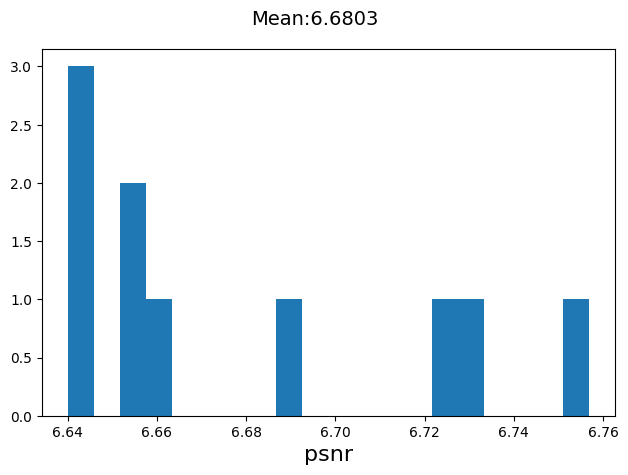

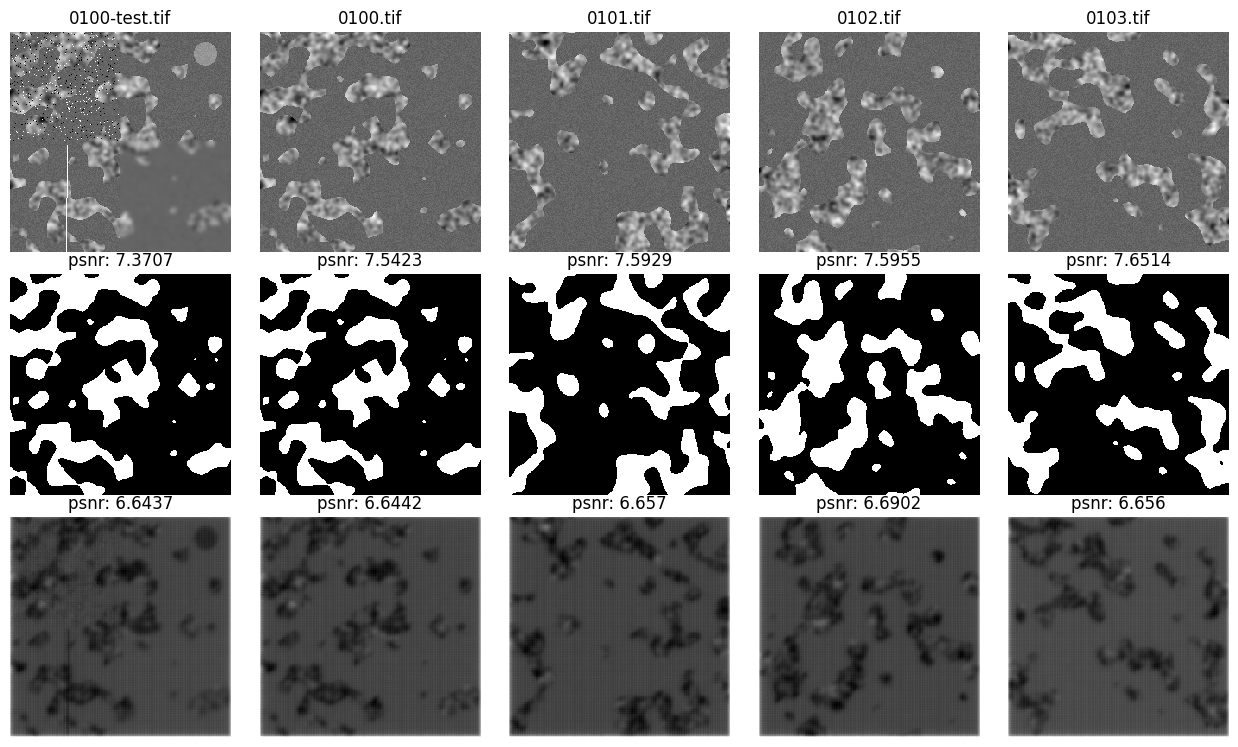

In [9]:
test = Test(model)
report_test = test.run(dataset, 'psnr', path)
create_report(path)

In [10]:
# Visualisation of the targets images and the predictions images
Tools.interactive_display(dataset.sources, test.predictions)